### <b>Part I: Data analysis, ML models & PyTorch</b>

#### Step 1 : Data analysis & Pre-processing

1. Select a real-world dataset from the source listed below.<br>

    The dataset should come from one of these resources:<br>
    ● Open Data Buffalo: https://data.buffalony.gov/<br>
    ● US Government's Data: https://www.data.gov/<br>
    ● Yahoo Finance: https://finance.yahoo.com/<br>
    ● Yahoo Webscope: https://webscope.sandbox.yahoo.com/

In [1]:
# Here I am using the website "https://data.buffalony.gov/"
# To obtain the dataset

# Dataset LINK : https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing-Archived/xdss-u53e/about_data

2. Provide main statistic about the dataset (e.g. number of entries, features)

In [2]:
# Before doing the above lets import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

covid_data = pd.read_csv("New_York_State_Statewide_COVID-19_Testing__Archived__20240129.csv")
covid_data

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
93289,03/01/2020,Wayne,0,0,0,0,0.00%,COUNTY
93290,03/01/2020,Westchester,0,0,0,0,0.00%,COUNTY
93291,03/01/2020,Western New York,0,0,0,0,0.00%,REGION
93292,03/01/2020,Wyoming,0,0,0,0,0.00%,COUNTY


In [4]:
# Using .describe() function to display
# the components of main statistics of the dataset

covid_data.describe()

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
count,93294.000000,9.329400e+04,93294.000000,9.329400e+04
mean,216.942183,1.455524e+05,4228.687343,3.081556e+06
std,1437.161409,5.659282e+05,17213.503880,1.164804e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,3.826250e+03,116.000000,1.056058e+05
50%,17.000000,1.432450e+04,385.000000,3.096670e+05
75%,77.000000,6.562250e+04,1932.750000,1.559845e+06
max,90132.000000,6.746468e+06,425782.000000,1.315037e+08


In [5]:
# We can see that the dataset has a total of 93294 rows and 8 columns 
# - consisting of numerical and plain text values

In [6]:
# Feature Names

feature_list = covid_data.columns.tolist()
feature_list

['Test Date',
 'County',
 'New Positives',
 'Cumulative Number of Positives',
 'Total Number of Tests Performed',
 'Cumulative Number of Tests Performed',
 'Test % Positive',
 'Geography']

In [7]:
# We want to know the shape of the dataset

covid_data.shape

(93294, 8)

3. Handle missing entries, if any. Possible solutions :<br>
• Drop rows with missing entries. If you have a large dataset and only a few missing<br>
 features, it may be acceptable to drop the rows containing missing values.<br>
• Impute missing data. Replace the missing entries with the mean/median/mode of 
the <br>feature. You can use K-Nearest Neighbor algorithm to find the matching sample.

In [8]:
# Lets check for any missing values in our dataset
# Because we have a significant number of rows, even if we encounter
# some 'NaN' or 'NULL' values - we can take the chance of removng the entire
# rows.

covid_data = covid_data.dropna()

In [9]:
covid_data

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
93289,03/01/2020,Wayne,0,0,0,0,0.00%,COUNTY
93290,03/01/2020,Westchester,0,0,0,0,0.00%,COUNTY
93291,03/01/2020,Western New York,0,0,0,0,0.00%,REGION
93292,03/01/2020,Wyoming,0,0,0,0,0.00%,COUNTY


In [10]:
# We can see that the rows that are at the end contains many ZEROES.
# Let us try to get rid of them

covid_data = covid_data.loc[
    (covid_data['New Positives'] != 0) |
    (covid_data['Cumulative Number of Tests Performed'] != 0) |
    (covid_data['Total Number of Tests Performed'] != 0) |
    (covid_data['Cumulative Number of Tests Performed'] != 0) |
    (covid_data['Test % Positive'] != '0.00%')
]

In [11]:
covid_data

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
93127,03/03/2020,STATEWIDE,0,1,9,10,0.00%,STATEWIDE
93144,03/03/2020,Westchester,0,1,1,2,0.00%,COUNTY
93179,03/02/2020,Mid-Hudson,1,1,1,1,100.00%,REGION
93200,03/02/2020,STATEWIDE,1,1,1,1,100.00%,STATEWIDE


In [12]:
covid_data.head(10)

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
5,08/30/2023,Cattaraugus,2,19716,6,319936,50.00%,COUNTY
6,08/30/2023,Cayuga,4,20954,16,422772,25.00%,COUNTY
7,08/30/2023,Central New York,57,233647,411,4655577,13.51%,REGION
8,08/30/2023,Chautauqua,6,30226,24,556634,23.81%,COUNTY
9,08/30/2023,Chemung,4,27264,25,516404,18.18%,COUNTY


In [13]:
# We see that the indexing has got distorted. Thus, that
# need to be fixed

covid_data = covid_data.reset_index(drop=True)

In [14]:
covid_data

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,Albany,17,80708,103,1473117,10.99%,COUNTY
1,08/30/2023,Allegany,0,11055,1,258396,0.00%,COUNTY
2,08/30/2023,Bronx,142,520477,1099,9553142,12.46%,COUNTY
3,08/30/2023,Broome,33,60508,87,1248106,38.10%,COUNTY
4,08/30/2023,Capital Region,63,292624,356,5538348,16.47%,REGION
...,...,...,...,...,...,...,...,...
92747,03/03/2020,STATEWIDE,0,1,9,10,0.00%,STATEWIDE
92748,03/03/2020,Westchester,0,1,1,2,0.00%,COUNTY
92749,03/02/2020,Mid-Hudson,1,1,1,1,100.00%,REGION
92750,03/02/2020,STATEWIDE,1,1,1,1,100.00%,STATEWIDE


4. Handle mismatched string formats, if any. <br>
For example, in the penguins dataset <br>
"Species" feature might appear as "Adelie" or "adelie," both of which refer to the <br>
same penguin species. These variations should be standardized to a consistent format<br>
such as "Adelie" or "adelie" to ensure consistency.

In [15]:
# Lets first create a copy of the dataset

data_copy = covid_data.copy()

In [16]:
data_copy.shape[0]

92752

In [17]:
# Here we can see that the features : "County" and "Geography"
# contain string values - they are needed to be consistent
# Thus, we will convert them all to lower case

for i in range(data_copy.shape[0]):
    data_copy['County'][i] = data_copy['County'][i].lower()
    data_copy['Geography'][i] = data_copy['Geography'][i].lower()

C:\Users\dpsvn\AppData\Local\Temp\ipykernel_15900\3369736593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['County'][i] = data_copy['County'][i].lower()
C:\Users\dpsvn\AppData\Local\Temp\ipykernel_15900\3369736593.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['Geography'][i] = data_copy['Geography'][i].lower()


In [18]:
data_copy

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,albany,17,80708,103,1473117,10.99%,county
1,08/30/2023,allegany,0,11055,1,258396,0.00%,county
2,08/30/2023,bronx,142,520477,1099,9553142,12.46%,county
3,08/30/2023,broome,33,60508,87,1248106,38.10%,county
4,08/30/2023,capital region,63,292624,356,5538348,16.47%,region
...,...,...,...,...,...,...,...,...
92747,03/03/2020,statewide,0,1,9,10,0.00%,statewide
92748,03/03/2020,westchester,0,1,1,2,0.00%,county
92749,03/02/2020,mid-hudson,1,1,1,1,100.00%,region
92750,03/02/2020,statewide,1,1,1,1,100.00%,statewide


In [19]:
# In the feature "Test % Positive", let us convert the values
# into numerical values

data_copy['Test % Positive'] = pd.to_numeric(data_copy['Test % Positive'].str.rstrip('%')) / 100

In [20]:
data_copy

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,albany,17,80708,103,1473117,0.1099,county
1,08/30/2023,allegany,0,11055,1,258396,0.0000,county
2,08/30/2023,bronx,142,520477,1099,9553142,0.1246,county
3,08/30/2023,broome,33,60508,87,1248106,0.3810,county
4,08/30/2023,capital region,63,292624,356,5538348,0.1647,region
...,...,...,...,...,...,...,...,...
92747,03/03/2020,statewide,0,1,9,10,0.0000,statewide
92748,03/03/2020,westchester,0,1,1,2,0.0000,county
92749,03/02/2020,mid-hudson,1,1,1,1,1.0000,region
92750,03/02/2020,statewide,1,1,1,1,1.0000,statewide


In [21]:
data_copy['Test % Positive'] = data_copy['Test % Positive']*100

In [22]:
data_copy

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,albany,17,80708,103,1473117,10.99,county
1,08/30/2023,allegany,0,11055,1,258396,0.00,county
2,08/30/2023,bronx,142,520477,1099,9553142,12.46,county
3,08/30/2023,broome,33,60508,87,1248106,38.10,county
4,08/30/2023,capital region,63,292624,356,5538348,16.47,region
...,...,...,...,...,...,...,...,...
92747,03/03/2020,statewide,0,1,9,10,0.00,statewide
92748,03/03/2020,westchester,0,1,1,2,0.00,county
92749,03/02/2020,mid-hudson,1,1,1,1,100.00,region
92750,03/02/2020,statewide,1,1,1,1,100.00,statewide


5. Handle outliers, if any. Detect and manage outliers within the dataset.<br>
For example, in the penguins dataset, while flipper lengths typically fall within the range <br>
of [180 – 210], certain entries might exhibit values like [10, 30]. These can be considered outliers. Possible solutions :<br>
• Remove outliers. If there are just a few outliers, you may eliminate the rows containing these outliers.<br>
• Impute outliers. Replace the outliers with the mean/median/mode of the feature.<br>

In [23]:
# We will first visualize the ouliers
# in every feature using boxplots

In [24]:
feature_list.remove('County')

In [25]:
feature_list.remove('Test Date')
feature_list.remove('Geography')

In [26]:
feature_list

['New Positives',
 'Cumulative Number of Positives',
 'Total Number of Tests Performed',
 'Cumulative Number of Tests Performed',
 'Test % Positive']




New Positives 🔽


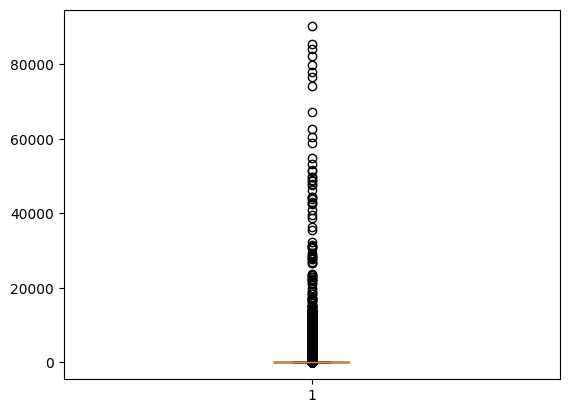




Cumulative Number of Positives 🔽


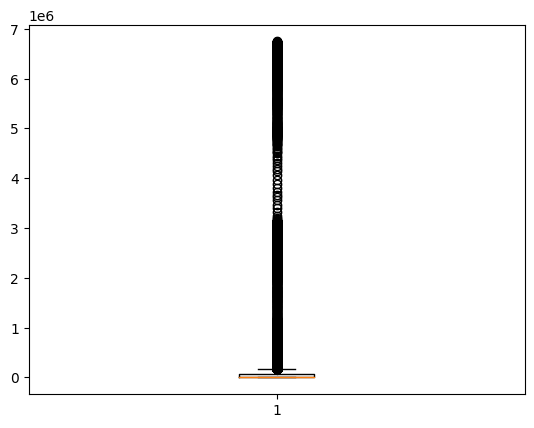




Total Number of Tests Performed 🔽


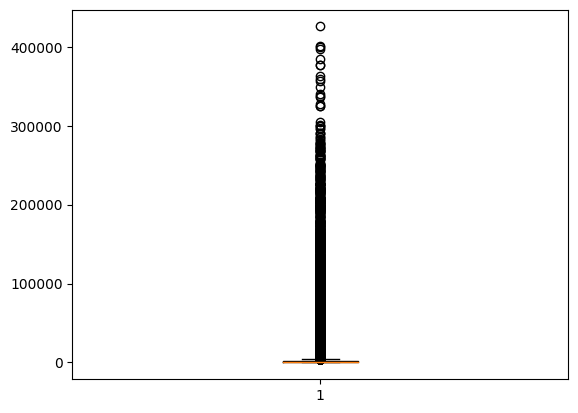




Cumulative Number of Tests Performed 🔽


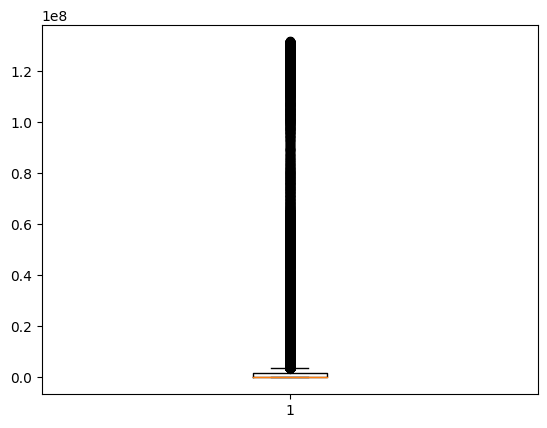




Test % Positive 🔽


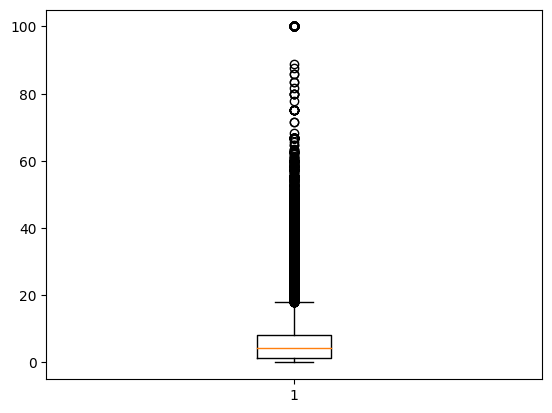

In [27]:
for i in feature_list:
    print("\n\n\n"+i+" 🔽")
    plt.boxplot(data_copy[i])
    plt.show()

In [28]:
# Let us try to impute the outliers using "MEDIAN" values
# As we have significant number of outliers in our dataset

for i in feature_list:
    median_value = data_copy[i].median()

    # Identifying outliers using IQR
    lower_limit = data_copy[i].quantile(0.25) - 1.5 * (data_copy[i].quantile(0.75) - data_copy[i].quantile(0.25))
    upper_limit = data_copy[i].quantile(0.75) + 1.5 * (data_copy[i].quantile(0.75) - data_copy[i].quantile(0.25))

    # Extracting the outliers
    outliers = (data_copy[i] < lower_limit) | (data_copy[i] > upper_limit)

    # Replacing the outliers with the median value
    data_copy.loc[outliers, i] = median_value

In [29]:
data_copy

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Test % Positive,Geography
0,08/30/2023,albany,17,80708.0,103,1473117,10.99,county
1,08/30/2023,allegany,0,11055.0,1,258396,0.00,county
2,08/30/2023,bronx,142,14480.5,1099,312971,12.46,county
3,08/30/2023,broome,33,60508.0,87,1248106,4.29,county
4,08/30/2023,capital region,63,14480.5,356,312971,16.47,region
...,...,...,...,...,...,...,...,...
92747,03/03/2020,statewide,0,1.0,9,10,0.00,statewide
92748,03/03/2020,westchester,0,1.0,1,2,0.00,county
92749,03/02/2020,mid-hudson,1,1.0,1,1,4.29,region
92750,03/02/2020,statewide,1,1.0,1,1,4.29,statewide


6. Using any data visualization library (e.g. matplotlib, seaborn, plotly), provide at least 5 visualization graphs related to your dataset. You can utilize any columns or a combination of columns in your dataset to generate graphs. E.g. correlation matrix, features vs. the target, counts of categorical features vs. the target.

Text(0.5, 1.0, "Histogram - 'New Positives")

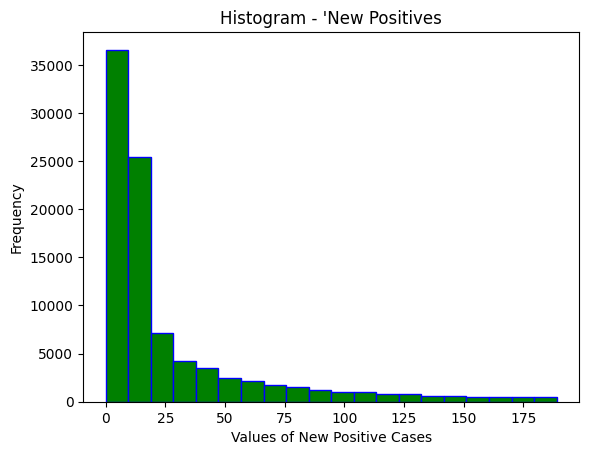

In [30]:
# PLOT NO. : 1 - Histogram - "New Positives"

plt.hist(data_copy['New Positives'], bins = 20, color='green', edgecolor = 'blue')
plt.xlabel("Values of New Positive Cases")
plt.ylabel("Frequency")
plt.title("Histogram - 'New Positives")

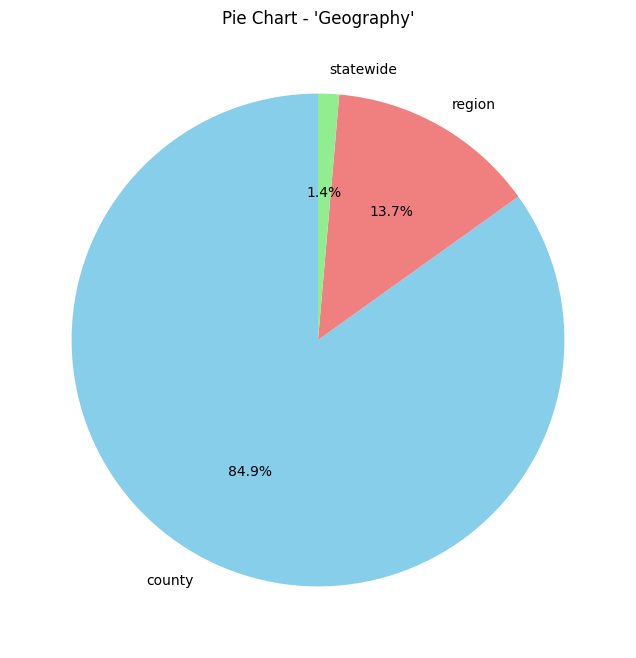

In [31]:
# PLOT NO. : 2 - Pie Chart - "New Positives"

# Counting occurrences of each value of the feature
counts = data_copy['Geography'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Pie Chart - 'Geography'")
plt.show()

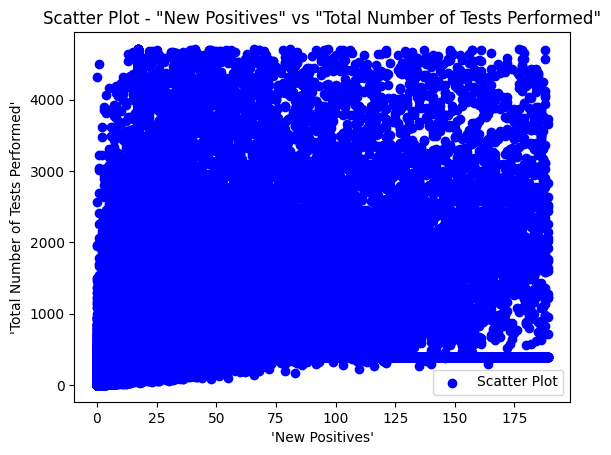

In [32]:
# PLOT NO. : 3 - Scatter Plot - "New Positives" vs "Total Number of Tests Performed"

plt.scatter(data_copy['New Positives'], data_copy['Total Number of Tests Performed'], color='blue', marker='o', label='Scatter Plot')

# Add labels and title
plt.xlabel('\'New Positives\'')
plt.ylabel('\'Total Number of Tests Performed\'')
plt.title('Scatter Plot - "New Positives" vs "Total Number of Tests Performed"')

plt.legend()
plt.show()

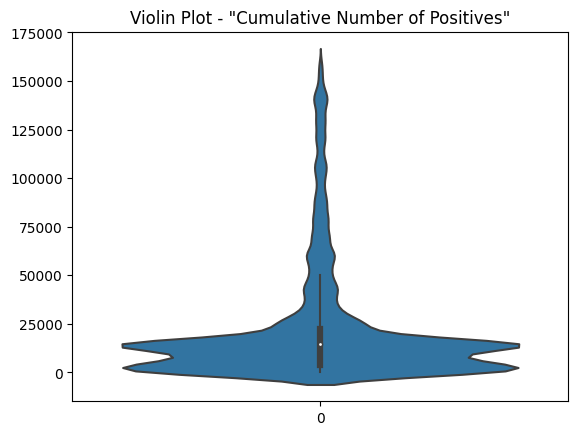

In [33]:
# PLOT NO. : 4 - Violin Plot - "Cumulative Number of Positives"

sns.violinplot(data=data_copy['Cumulative Number of Positives'])
plt.title('Violin Plot - "Cumulative Number of Positives"')
plt.show()

C:\Users\dpsvn\AppData\Local\Temp\ipykernel_15900\3496334952.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Number of Tests Performed', y='Geography', data=data_copy, ci=None)


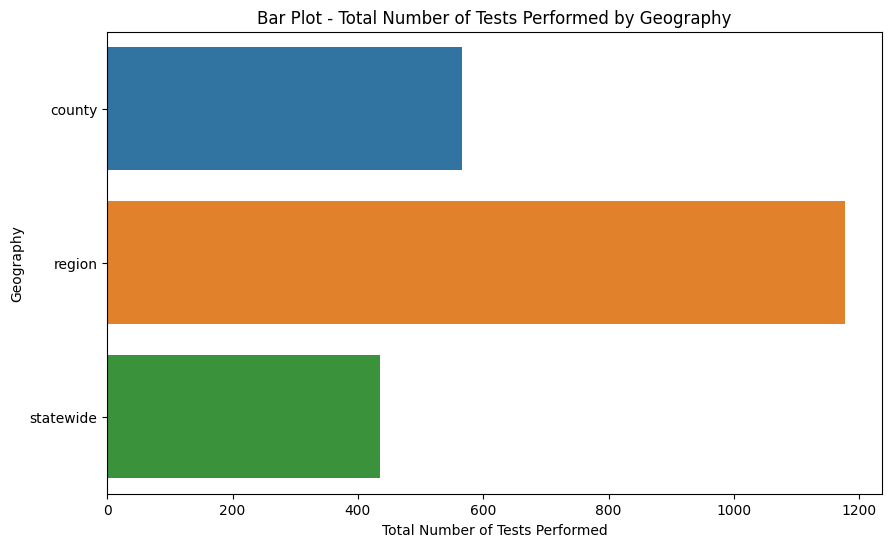

In [34]:
# PLOT NO. : 5 - Bar Plot - 'Total Number of Tests Performed' vs 'Geography'

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Number of Tests Performed', y='Geography', data=data_copy, ci=None)
plt.title('Bar Plot - Total Number of Tests Performed by Geography')
plt.xlabel('Total Number of Tests Performed')
plt.ylabel('Geography')
plt.show()

7. Identify uncorrelated or unrelated features.<br>
Unrelated or uncorrelated features can introduce confusion to your model and negatively impact its performance. You can compute the correlation matrix between the features and the target variable. Features with a low correlation coefficient should be identified and subsequently dropped from the dataset to enhance model performance.

C:\Users\dpsvn\AppData\Local\Temp\ipykernel_15900\2468990109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = data_copy.corr()


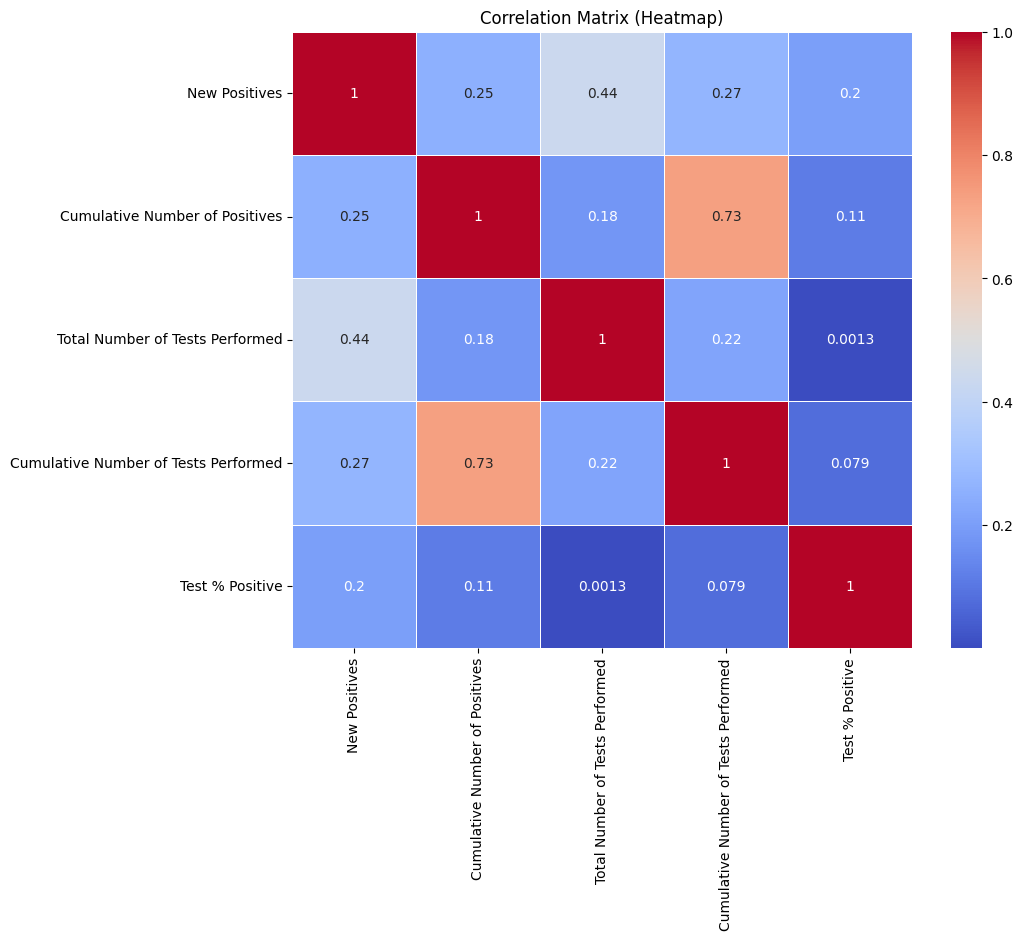

In [35]:
cor_mat = data_copy.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix (Heatmap)')
plt.show()

In [36]:
# Using the above correlation matrix - we can see that the features
# "Test % Positive" and "Total Number of Tests Performed" have almost ZERO
# Correlation to each other.

# When compared to other feature - "Test % Positive" has a correlation value
# Thus, we shall have to remove that feature form the dataset

data_copy = data_copy.drop(columns = "Test % Positive") 

In [37]:
data_copy

,Test Date,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Geography
0,08/30/2023,albany,17,80708.0,103,1473117,county
1,08/30/2023,allegany,0,11055.0,1,258396,county
2,08/30/2023,bronx,142,14480.5,1099,312971,county
3,08/30/2023,broome,33,60508.0,87,1248106,county
4,08/30/2023,capital region,63,14480.5,356,312971,region
...,...,...,...,...,...,...,...
92747,03/03/2020,statewide,0,1.0,9,10,statewide
92748,03/03/2020,westchester,0,1.0,1,2,county
92749,03/02/2020,mid-hudson,1,1.0,1,1,region
92750,03/02/2020,statewide,1,1.0,1,1,statewide


In [38]:
# We can also see that the feature "Test Date" has no significance as well
# So let us remove that as well

data_copy = data_copy.drop(columns = "Test Date")
data_copy

,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Geography
0,albany,17,80708.0,103,1473117,county
1,allegany,0,11055.0,1,258396,county
2,bronx,142,14480.5,1099,312971,county
3,broome,33,60508.0,87,1248106,county
4,capital region,63,14480.5,356,312971,region
...,...,...,...,...,...,...
92747,statewide,0,1.0,9,10,statewide
92748,westchester,0,1.0,1,2,county
92749,mid-hudson,1,1.0,1,1,region
92750,statewide,1,1.0,1,1,statewide


8. Convert features with string datatype to categorical. Possible ways :<br>
• One-hot encoding, creating binary columns for each category, denoting their presence or absence. E.g., in the "Species" feature, "Adelie," "Chinstrap," and "Gentoo" become binary columns with "1" for presence and "0" for absence.<br>
• Label encoding assigns unique integers to distinct feature values, useful for ordinal relationships among categories. E.g., "Small" as 0, "Medium" as 1, and "Large" as 2 can represent a "Size" feature. However, it may introduce unintended patterns.<br>
• You can use OneHotEncoder from scikit-learn

In [39]:
# Here we need to apply "OneHotEncoding" on the features - "County" and "Geography"

data_copy['County'] = pd.Categorical(data_copy['County'])
data_copy['County'] = data_copy['County'].cat.codes

data_copy['Geography'] = pd.Categorical(data_copy['Geography'])
data_copy['Geography'] = data_copy['Geography'].cat.codes

data_copy

,County,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,Geography
0,0,17,80708.0,103,1473117,0
1,1,0,11055.0,1,258396,0
2,2,142,14480.5,1099,312971,0
3,3,33,60508.0,87,1248106,0
4,4,63,14480.5,356,312971,1
...,...,...,...,...,...,...
92747,59,0,1.0,9,10,2
92748,69,0,1.0,1,2,0
92749,31,1,1.0,1,1,1
92750,59,1,1.0,1,1,2


9. Normalize non-categorical features (scale numerical variables to have zero mean and unit variance)<br>
a. Find the min and max values for each column.<br>
b. Rescale dataset columns to the range from 0 to 1<br>
c. You can use StandardScaler from scikit-learn or Normalize from PyTorch<br><br>
Why do we do this? Normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model

In [40]:
# We will use "StandardScaler" from scikit-learn to Normalize
# But we need to make sure that we only normalize
# "Non-Categorical" Features

feature_list = data_copy.columns.to_list()

In [41]:
feature_list

['County',
 'New Positives',
 'Cumulative Number of Positives',
 'Total Number of Tests Performed',
 'Cumulative Number of Tests Performed',
 'Geography']

In [42]:
data_copy_dup = data_copy.drop(columns = ['County', 'Geography'])

In [43]:
data_copy_dup

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,17,80708.0,103,1473117
1,0,11055.0,1,258396
2,142,14480.5,1099,312971
3,33,60508.0,87,1248106
4,63,14480.5,356,312971
...,...,...,...,...
92747,0,1.0,9,10
92748,0,1.0,1,2
92749,1,1.0,1,1
92750,1,1.0,1,1


In [44]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_copy_dup)

In [45]:
normalized_data

array([[-0.26557897,  1.916591  , -0.59897839,  1.25937865],
       [-0.72523527, -0.36073698, -0.7111124 , -0.35664494],
       [ 3.11424672, -0.24873912,  0.49597718, -0.28404021],
       ...,
       [-0.69819666, -0.72215118, -0.7111124 , -0.70040488],
       [-0.69819666, -0.72215118, -0.7111124 , -0.70040488],
       [-0.69819666, -0.72215118, -0.7111124 , -0.70040488]])

In [46]:
normalized_df = pd.DataFrame(normalized_data, columns=data_copy_dup.columns)

In [47]:
normalized_df

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed
0,-0.265579,1.916591,-0.598978,1.259379
1,-0.725235,-0.360737,-0.711112,-0.356645
2,3.114247,-0.248739,0.495977,-0.284040
3,0.167039,1.256145,-0.616568,0.960032
4,0.978197,-0.248739,-0.320842,-0.284040
...,...,...,...,...
92747,-0.725235,-0.722151,-0.702318,-0.700393
92748,-0.725235,-0.722151,-0.711112,-0.700404
92749,-0.698197,-0.722151,-0.711112,-0.700405
92750,-0.698197,-0.722151,-0.711112,-0.700405


In [48]:
normalized_df = pd.concat([normalized_df, data_copy['County']], axis = 1)

In [49]:
normalized_df

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,County
0,-0.265579,1.916591,-0.598978,1.259379,0
1,-0.725235,-0.360737,-0.711112,-0.356645,1
2,3.114247,-0.248739,0.495977,-0.284040,2
3,0.167039,1.256145,-0.616568,0.960032,3
4,0.978197,-0.248739,-0.320842,-0.284040,4
...,...,...,...,...,...
92747,-0.725235,-0.722151,-0.702318,-0.700393,59
92748,-0.725235,-0.722151,-0.711112,-0.700404,69
92749,-0.698197,-0.722151,-0.711112,-0.700405,31
92750,-0.698197,-0.722151,-0.711112,-0.700405,59


In [50]:
normalized_df = pd.concat([normalized_df, data_copy['Geography']], axis = 1)

In [51]:
normalized_df

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,County,Geography
0,-0.265579,1.916591,-0.598978,1.259379,0,0
1,-0.725235,-0.360737,-0.711112,-0.356645,1,0
2,3.114247,-0.248739,0.495977,-0.284040,2,0
3,0.167039,1.256145,-0.616568,0.960032,3,0
4,0.978197,-0.248739,-0.320842,-0.284040,4,1
...,...,...,...,...,...,...
92747,-0.725235,-0.722151,-0.702318,-0.700393,59,2
92748,-0.725235,-0.722151,-0.711112,-0.700404,69,0
92749,-0.698197,-0.722151,-0.711112,-0.700405,31,1
92750,-0.698197,-0.722151,-0.711112,-0.700405,59,2


10. Choose your target Y and features 𝑿

In [52]:
# Here we are choosing the feature "Geography" as our target Y
# And all other features as input X

x_input = normalized_df.drop(columns = 'Geography')
y_target = normalized_df['Geography']

11. Split the dataset into training, testing and validation sets.<br>
You can use train_test_split from scikit-learn<br>
Hint: first you can split the dataset into ‘training’ and ‘testing’ batches. Then take the ‘training’ batch and split it again for ‘training’ and ‘validation’<br><br>
Why do we need to split into training, testing and validation?<br>
• Training set: used to train the model to learn the patterns or features in the data. It is important to have a large and representative training set so that the model can learn well.<br>
• Validation set: used to tune the model hyperparameters and to prevent overfitting. Overfitting is when the model learns the training data too well and cannot generalize to new data. Hyperparameters are parameters that are not learned from the data, but are set by the user. By tuning the hyperparameters, we can improve the model's performance on the validation set.<br>
• Test set: used to evaluate the final model's performance on unseen data. This gives us a good idea of how well the model will perform in the real world. The commonly used splits of 70:15:15 or 80:10:10 are good starting points, but the optimal split ratio will vary depending on the size and characteristics of the dataset.

In [53]:
# Data will be splitted in 80:10:10 (train:validation:test) ratio

# Here, we have to create validation dataset
# using training dataset only

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(x_input, y_target, test_size=0.1, random_state=42)

In [54]:
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.1111217595, random_state=42)

12. Print the shape of your X_train, y_train, X_test, y_test, X_validation, y_validation

In [55]:
X_train

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,County
57194,1.113390,-0.248739,-0.282365,-0.284040,35
71035,3.384633,-0.627564,0.719146,-0.574491,6
22433,-0.590042,-0.385585,-0.650648,-0.461084,22
8896,-0.725235,-0.254477,-0.673734,-0.369321,63
78672,0.599656,-0.240026,0.829081,-0.495672,51
...,...,...,...,...,...
38390,0.140000,0.305888,0.275007,0.291033,65
46084,1.194506,-0.423512,-0.103170,-0.429830,21
16075,0.302232,2.020955,-0.438473,1.319147,15
14151,-0.481888,0.085652,-0.478050,-0.166776,62


In [56]:
X_train.shape

(74200, 5)

In [57]:
X_test

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,County
92146,-0.725235,-0.722184,-0.711112,-0.700390,20
32082,-0.265579,-0.248739,-0.282365,-0.284040,35
40454,-0.481888,-0.400331,-0.535216,-0.411447,12
37114,-0.130386,-0.284622,-0.410989,-0.258330,30
9406,-0.644119,0.096376,-0.574793,-0.142691,62
...,...,...,...,...,...
52570,-0.238540,-0.590749,-0.435175,-0.518876,10
92275,-0.725235,-0.722184,-0.711112,-0.700400,5
51165,0.464463,-0.178428,0.808193,0.009629,65
40758,-0.103347,-0.282661,-0.368114,-0.337287,24


In [58]:
X_test.shape

(9276, 5)

In [59]:
X_validation

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,County
89669,-0.725235,-0.720418,-0.686927,-0.698787,25
7175,-0.725235,-0.170287,-0.664940,-0.314882,21
6102,-0.617081,3.919049,-0.490142,2.224172,43
30796,-0.698197,-0.323268,-0.664940,-0.410303,63
2802,-0.671158,-0.240811,-0.707814,-0.300174,28
...,...,...,...,...,...
67165,-0.481888,-0.581921,-0.476950,-0.555150,5
69865,-0.265579,0.823226,-0.282365,1.103976,4
26763,-0.130386,0.288527,-0.526421,-0.022261,45
58231,-0.103347,1.720550,2.833202,1.589034,50


In [60]:
X_validation.shape

(9276, 5)

In [61]:
y_train

57194    0
71035    0
22433    0
8896     0
78672    0
        ..
38390    0
46084    0
16075    0
14151    0
42212    1
Name: Geography, Length: 74200, dtype: int8

In [62]:
y_train.shape

(74200,)

In [63]:
y_test

92146    0
32082    0
40454    0
37114    0
9406     0
        ..
52570    0
92275    0
51165    0
40758    0
21165    0
Name: Geography, Length: 9276, dtype: int8

In [64]:
y_test.shape

(9276,)

In [65]:
y_validation

89669    0
7175     0
6102     0
30796    0
2802     0
        ..
67165    0
69865    1
26763    0
58231    0
59838    0
Name: Geography, Length: 9276, dtype: int8

In [66]:
y_validation.shape

(9276,)

<br>
<br>

#### Step 2 : ML Models
1. Apply ML algorithms (min 3 different algorithms) to model the target variable. This can be either a classification or regression task. Note:<br>
• You can use any of the libraries with inbuilt ML functions<br>
• The accuracy for any models used should be 65% or higher.<br>

In [67]:
# Algo. 1 : Decision Trees Classification

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier 

# Creating classifier instance
dt_classifier = DecisionTreeClassifier()

# Classifier Training
dt_classifier.fit(X_train, y_train)

# Making predictions on the validation set
y_pred_validation_dt = dt_classifier.predict(X_validation)

# Evaluating the accuracy on the validation set
accuracy_validation_dt = accuracy_score(y_validation, y_pred_validation_dt)
print(f"Validation Set - Accuracy (Decision Tree Classifier) : {accuracy_validation_dt}")

# Making predictions on the test set
y_pred_test_dt = dt_classifier.predict(X_test)

# Evaluating the accuracy on the test set
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
print(f"Test Set - Accuracy (Decision Tree Classifier) : {accuracy_test_dt}")

Validation Set - Accuracy (Decision Tree Classifier) : 0.9976282880551962
Test Set - Accuracy (Decision Tree Classifier) : 0.9977360931435963


In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating mean squared error (loss) on the test set
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
print(f"Test Set - Mean Squared Error (Decision Tree Classifier): {mse_test_dt}")

Test Set - Mean Squared Error (Decision Tree Classifier): 0.0029107373868046574


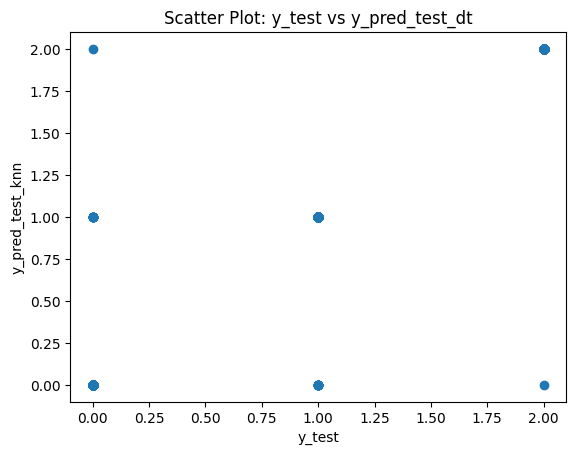

In [91]:
# Scatter plot : y_test vs y_pred_test_dt

plt.scatter(y_test, y_pred_test_dt)
plt.title('Scatter Plot: y_test vs y_pred_test_dt')
plt.xlabel('y_test')
plt.ylabel('y_pred_test_knn')
plt.show()

In [68]:
# Algo. 2 : Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

# Creating classifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Classifier Training
rf_classifier.fit(X_train, y_train)

# Making predictions on the validation set
y_pred_validation_rf = rf_classifier.predict(X_validation)

# Evaluating the accuracy on the validation set
accuracy_validation_rf = accuracy_score(y_validation, y_pred_validation_rf)
print(f"Validation Set - Accuracy (Random Forest Classifier) : {accuracy_validation_rf}")

# Making predictions on the test set
y_pred_test_rf = rf_classifier.predict(X_test)

# Evaluating the accuracy on the test set
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(f"Test Set - Accuracy (Random Forest Classifier) : {accuracy_test_rf}")


Validation Set - Accuracy (Random Forest Classifier) : 0.9975204829667961
Test Set - Accuracy (Random Forest Classifier) : 0.9989219491159983


In [97]:
# Calculating mean squared error (loss) on the test set
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
print(f"Test Set - Mean Squared Error (Random Forest Classifier): {mse_test_rf}")

Test Set - Mean Squared Error (Random Forest Classifier): 0.0010780508840017248


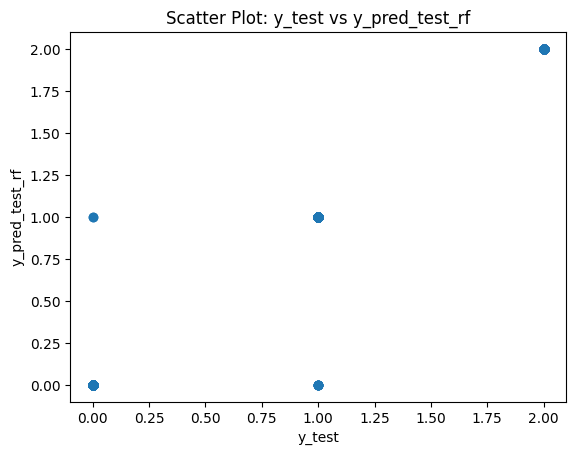

In [92]:
# Scatter plot : y_test vs y_pred_test_rf

plt.scatter(y_test, y_pred_test_rf)
plt.title('Scatter Plot: y_test vs y_pred_test_rf')
plt.xlabel('y_test')
plt.ylabel('y_pred_test_rf')
plt.show()

In [69]:
# Algo. 3 : KNN (K-Nearest Neighbour)

from sklearn.neighbors import KNeighborsClassifier


# Creating classifier instance (here we are taking K=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Classifier Training
knn_classifier.fit(X_train, y_train)

# Making predictions on the validation set
y_pred_validation_knn = knn_classifier.predict(X_validation)

# Evaluating the accuracy on the validation set
accuracy_validation_knn = accuracy_score(y_validation, y_pred_validation_knn)
print(f"Validation Set - Accuracy (KNN) : {accuracy_validation_knn}")

# Making predictions on the test set
y_pred_test_knn = knn_classifier.predict(X_test)

# Evaluating the accuracy on the test set
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print(f"Test Set - Accuracy (KNN) : {accuracy_test_knn}")


Validation Set - Accuracy (KNN) : 0.9996765847347995
Test Set - Accuracy (KNN) : 0.9995687796463993


In [99]:
# Calculating mean squared error (loss) on the test set
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)
print(f"Test Set - Mean Squared Error (K-Nearest Neighbour): {mse_test_knn}")

Test Set - Mean Squared Error (K-Nearest Neighbour): 0.00043122035360068997


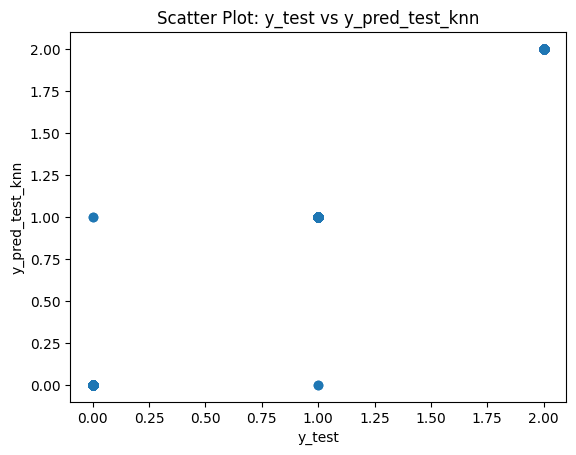

In [93]:
# Scatter plot : y_test vs y_pred_test_knn

plt.scatter(y_test, y_pred_test_knn)
plt.title('Scatter Plot: y_test vs y_pred_test_knn')
plt.xlabel('y_test')
plt.ylabel('y_pred_test_knn')
plt.show()

2. Provide a comparison of the results of different ML models you have used. This should be done in the form of graph representation and your reasoning about the results.

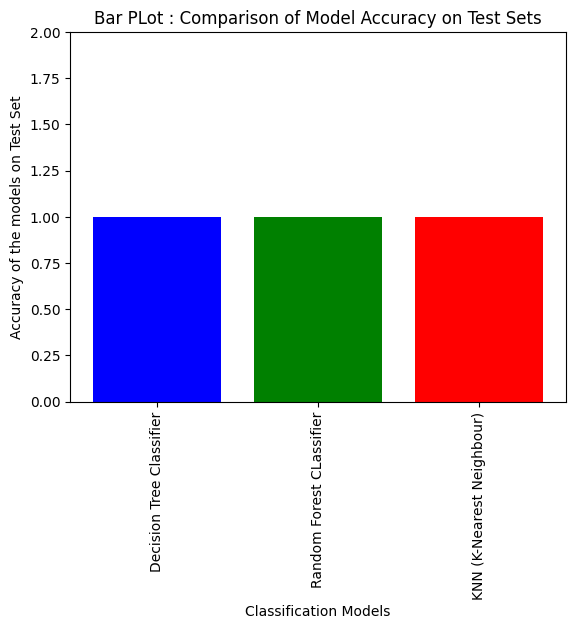

In [75]:
# Here I will provide the comparison in the form of bar plot

# Model names
models = ['Decision Tree Classifier', 'Random Forest CLassifier', 'KNN (K-Nearest Neighbour)']

# Accuracy values
accuracies = [accuracy_test_dt, accuracy_test_rf, accuracy_test_knn]

# Creating a bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classification Models')
plt.xticks(rotation=90)
plt.ylabel('Accuracy of the models on Test Set')
plt.title('Bar PLot : Comparison of Model Accuracy on Test Sets')
plt.ylim(0, 2)
plt.show()

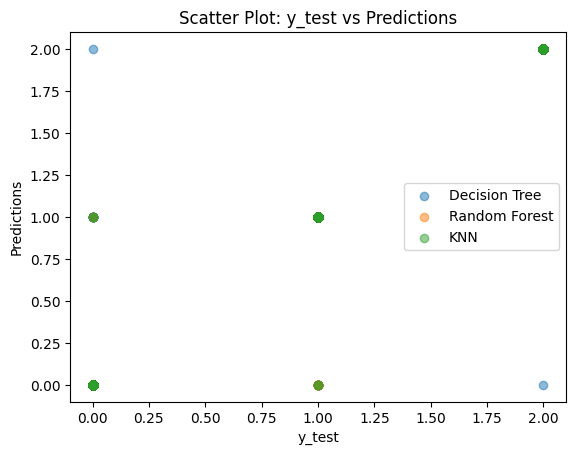

In [101]:
# Scatter plot for Decision Tree model
plt.scatter(y_test, y_pred_test_dt, label='Decision Tree', alpha=0.5)

# Scatter plot for Random Forest model
plt.scatter(y_test, y_pred_test_rf, label='Random Forest', alpha=0.5)

# Scatter plot for K-Nearest Neighbors model
plt.scatter(y_test, y_pred_test_knn, label='KNN', alpha=0.5)

# Set plot labels and title
plt.title('Scatter Plot: y_test vs Predictions')
plt.xlabel('y_test')
plt.ylabel('Predictions')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [71]:
# From the above plot we can conclude that there is not much difference in the accuracy scores
# shown by the classifiers. Possible reasons can be as follows :

'''
It's possible that the dataset lacks distinguishing patterns or traits that w
ould enable some models to perform noticeably better than others. Certain 
datasets have inherent complexity, making it difficult for certain algorithms to 
identify significant patterns in them.
'''

# Talking about acute comparison among the models : KNN seems to have the highest
# Accuracy score among all. A possible reson can be as follows :

'''
Decision Trees and Random Forest might struggle with feature importance when 
features are highly correlated. KNN, being a distance-based method, can naturally 
handle correlated features.
'''

'\nDecision Trees and Random Forest might struggle with feature importance when \nfeatures are highly correlated. KNN, being a distance-based method, can naturally \nhandle correlated features.\n'

<br>
<br>

#### Step 3 : Intro to PyTorch and Building a NN

1. Complete Pytorch tutorial listed below. Use your own example values and 
hyperparameters, where applicable, while following the tutorial examples.
<br><br>
Deep Learning With Pytorch: A 60 Minute Blitz (https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)<br><br>
Tips:
    1. To get started -- click on the Next button on the bottom right

2. Complete all 4 parts:<br>
• Tensors<br>
• A Gentle Introduction to torch.autograd<br>
• Neural Networks<br>
• Training a Classifier<br>
You can combine the results into one Jupyter notebook file. There is no need to include
theoretical materials. Code with your values and clear section naming is sufficient.

3. Hyperparameters tuning.<br>
Provide the results of the neural network setup using your own THREE different sets of
parameters (consider changing the number of layers, number of nodes, activation
function, optimizer, etc.). While evaluation, accuracy will not be considered as a priority.
The primary motivation is for you to explore how different NN setup influences the
accuracy of the model.

In [72]:
# Step 3 : Component 1, 2, 3 - DONE IN "cifar10_tutorial.ipynb" file

4. Build a shallow NN and apply that to solve the problem you defined in Part I. An
accuracy of 65% or higher will be considered for evaluation.

5. Save the model that you designed in Step 3 (e.g. https://pytorch.org/tutorials/beginner/saving_loading_models.html)

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_validation.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_validation.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Defining shallow neural network
class ShallowNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initializing the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(np.unique(y_train))

model = ShallowNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.91)

# Combining features and labels into datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creating DataLoader for batches
batch_size = 64
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in valloader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {val_loss/len(valloader):.4f}, Accuracy: {100*correct/total:.2f}%')

print('Finished Training')

# Saving the PyTorch model directly to an HDF5 file
h5_path = 'model.h5'
torch.save(model.state_dict(), h5_path)
print(f"Model saved in {h5_path}")

# Testing the model
y_pred_test_nn = []
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred_test_nn.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')


Epoch 1/10, Loss: 0.4351, Accuracy: 86.46%
Epoch 2/10, Loss: 0.4296, Accuracy: 86.65%
Epoch 3/10, Loss: 0.4221, Accuracy: 86.85%
Epoch 4/10, Loss: 0.4083, Accuracy: 87.10%
Epoch 5/10, Loss: 0.4111, Accuracy: 87.00%
Epoch 6/10, Loss: 0.3985, Accuracy: 87.02%
Epoch 7/10, Loss: 0.4098, Accuracy: 86.09%
Epoch 8/10, Loss: 0.4071, Accuracy: 86.10%
Epoch 9/10, Loss: 0.3973, Accuracy: 86.96%
Epoch 10/10, Loss: 0.4061, Accuracy: 86.87%
Finished Training
Model saved in model.h5
Accuracy on test set: 85.73738680465718%


6. Compare and analyze the results.

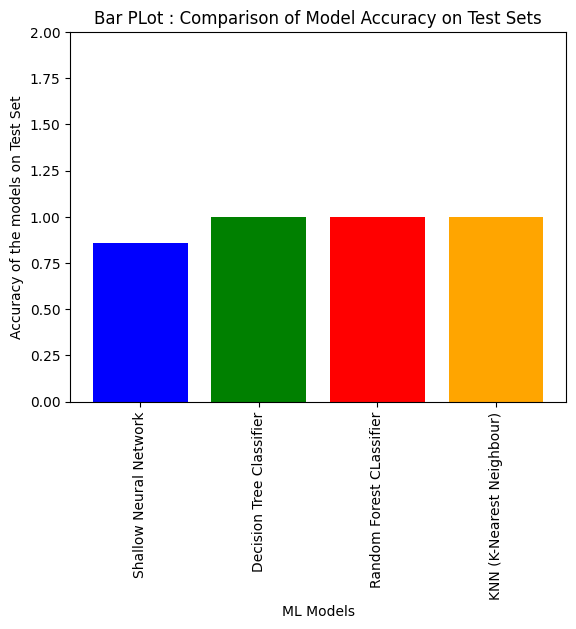

In [103]:
# The accuracy on the test set for the Neural Network is 85.99% (Approx.)

'''
On the other hand the accuracies of the ML models implemented are as follows :

Decision Tree Classifier : 99.77%
Random Forest Classifier : 99.89%
K-Nearest Neighbour (K-NN) : 99.96%
'''

# So we can clearly see that K-NN is still the superior among all the models

# Lets try to compare them graphically

# Model names
models = ['Shallow Neural Network','Decision Tree Classifier', 'Random Forest CLassifier', 'KNN (K-Nearest Neighbour)']

# Accuracy values
accuracies = [correct / total, accuracy_test_dt, accuracy_test_rf, accuracy_test_knn]

# Creating a bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('ML Models')
plt.xticks(rotation=90)
plt.ylabel('Accuracy of the models on Test Set')
plt.title('Bar PLot : Comparison of Model Accuracy on Test Sets')
plt.ylim(0, 2)
plt.show()

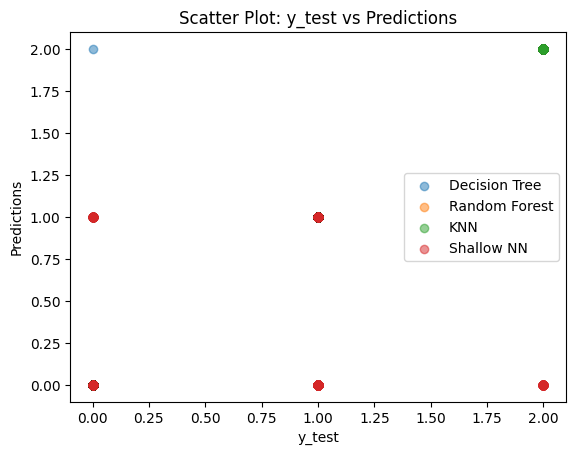

In [105]:
# Scatter plot for Decision Tree model
plt.scatter(y_test, y_pred_test_dt, label='Decision Tree', alpha=0.5)

# Scatter plot for Random Forest model
plt.scatter(y_test, y_pred_test_rf, label='Random Forest', alpha=0.5)

# Scatter plot for K-Nearest Neighbors model
plt.scatter(y_test, y_pred_test_knn, label='KNN', alpha=0.5)

# Scatter plot for Shallow Neural Network model
plt.scatter(y_test, y_pred_test_nn, label='Shallow NN', alpha=0.5)

# Setting plot labels and title
plt.title('Scatter Plot: y_test vs Predictions')
plt.xlabel('y_test')
plt.ylabel('Predictions')

# Displaying legend
plt.legend()

# Showing the plot
plt.show()

References :

https://www.markdownguide.org/
https://numpy.org/doc/stable/index.html
https://pandas.pydata.org/
https://matplotlib.org/
https://seaborn.pydata.org/
https://docs.python.org/3/tutorial/index.html
https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
https://www.w3schools.com/python/python_lists.asp
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
https://www.w3schools.com/python/ref_string_strip.asp
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
https://datascience.stackexchange.com/questions/54808/how-to-remove-outliers-using-box-plot
https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
https://seaborn.pydata.org/generated/seaborn.violinplot.html
https://www.w3schools.com/datascience/ds_stat_correlation_matrix.asp
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://scikit-learn.org/stable/
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://www.geeksforgeeks.org/python-mean-squared-error/
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html